# Partielle Differentialgleichungen

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
print(sys.version)

3.10.9 (main, Dec 15 2022, 17:11:09) [Clang 14.0.0 (clang-1400.0.29.202)]


## Symbolische Mathematik mit Python

Ein hervorragendes Tool für die symbolische Mathematik mit Python ist das Paket `sympy`, das wir zunächst einbinden. Mit `init_printing` sorgen wir für eine schönere Darstellung der mathematischen Symbole.

In [4]:
import sympy as sp
sp.init_printing()

### Lösung von Gleichungen

Zunächst ein lineares Gleichungssystem.

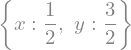

In [5]:
x, y, z = sp.symbols("x y z")
sp.solve([x + y - 2, x - y + 1], (x, y))

Aber auch nichtlineare Systeme lassen sich manchmal mit Sympy lösen.

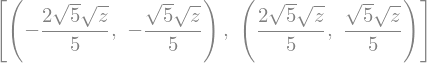

In [6]:
sp.solve([x - 2*y, x**2 + y**2 - z], (x, y))

### Ableitungen und Integrale

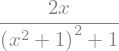

In [7]:
f = sp.atan(1 + x*x)
df = f.diff()
df

Wenn wir dies integrieren, sollte wieder die ursprüngliche Funktion herauskommen.

In [8]:
sp.integrate(df, x)

Nicht allle Ausdrücke werden sofort vereinfacht.

In [9]:
a = sp.cos(x)**2 + sp.sin(x)**2
a

Mit `simplify` lässt sich dies beheben.

In [10]:
a.simplify()

`simplify`, `diff` und viele andere Methoden lassen sich alternativ als Funktionen aufrufen:

In [11]:
df.integrate(x)

Auch bestimmte Integrale lassen sich natürlich berechnen.

In [12]:
sp.integrate(1/(1 + x*x), (x, 0, 1))

Das Symbol `oo` steht in Sympy für unendlich. Wir können es als `sp.oo` einbinden oder direkt aus Sympy importieren.

In [13]:
from sympy import oo

In [14]:
sp.integrate(sp.exp(-x**2), (x, -oo, oo))

### Summen und Reihen

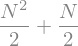

In [15]:
k, N = sp.symbols("k N")
sp.summation(k, (k,1,N))

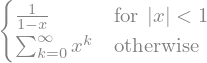

In [16]:
expr = sp.summation( x**k, (k, 0, oo))
expr

Am letzten Beispiel ist zu sehen, wie sympy mit Fallunterscheidungen umgeht. Implementiert ist das Ergebnis als stückweise definierte Funktion, auf deren Definition wir mit `expr.args` zugreifen können:

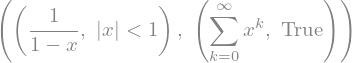

In [17]:
expr.args

Hiermit können wir natürlich auch die Definitionen auf Teilbereichen extrahieren:

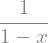

In [18]:
expr.args[0][0]

Wir können auch mit Hilfe einer Substitution Bedingungen als  wahr annehmen:

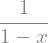

In [19]:
expr = sp.summation( x**k, (k, 0, oo)).subs(sp.Abs(x) < 1, True)
expr

Dies hat allerdings seine Grenzen. Wir müssen den genauen Ausdruck angeben, sonst wird die Ersetzung nicht durchgeführt. Der folgende äquivalente Ausdruck wird nicht wunschgemäß ausgewertet:

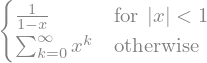

In [20]:
sp.summation( x**k, (k, 0, oo)).subs(sp.Abs(x) - 1 < 0, True)

### Lösung partieller Differentialgleichungen
Wir lösen die Gleichung
$$ u_t - v u_x = 0, $$
wobei $v$ eine reelle Konstante ist.

In [21]:
x, t, v = sp.symbols("x t v")
u = sp.Function("u")
phi = u(x, t)
eq = sp.diff(phi, t) + v*sp.diff(phi, x) # linke Seite der PDGl
sol = sp.pdsolve(eq)  # rechte Seite wird als 0 angenommen
sol

In [31]:
rhs = sol.rhs
rhs

In [32]:
F = sp.Function("F")
rhs.subs(F, sp.sin)